<a href="https://colab.research.google.com/github/VarshithSavanapalli/AIML-25_B15/blob/main/2303A51837_AIML_LABEXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Accuracy with k=3: 100.00%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


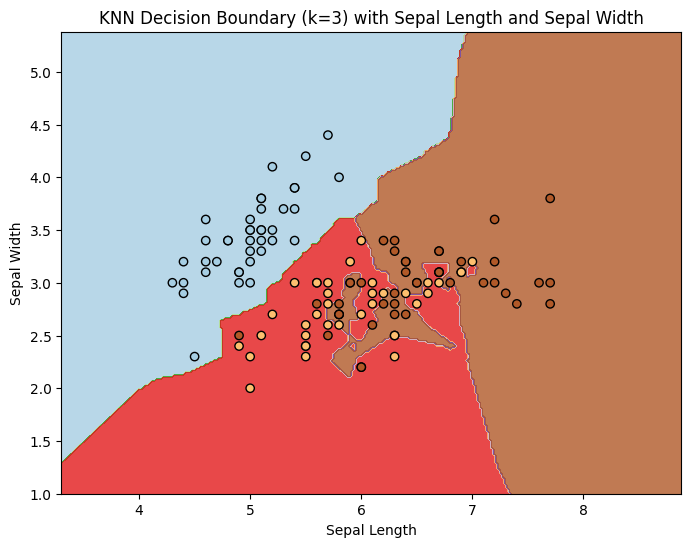

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


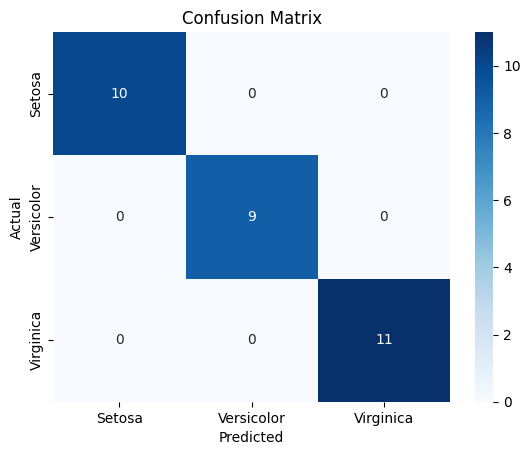

Accuracy with feature scaling (k=3): 100.00%
Accuracy with k=5: 100.00%


In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris
import seaborn as sns

# Load the dataset from the URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
data = pd.read_csv(url, header=None, names=column_names)

# Display first few rows of the data
print(data.head())

# Step 1: Apply KNN on the dataset with k=3 and evaluate accuracy
# Convert categorical labels (species) to numeric values
data['species'] = data['species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

# Split the dataset into features (X) and target (y)
X = data.iloc[:, :-1]  # Features: sepal_length, sepal_width, petal_length, petal_width
y = data['species']    # Target: species

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the KNN model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with k=3: {accuracy * 100:.2f}%")

# Step 2: Visualize the decision boundary for KNN with k=3
# Use only two features for visualization (e.g., sepal length and sepal width)
X_vis = X[['sepal_length', 'sepal_width']]

# Split the dataset again for visualization
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.2, random_state=42)

# Initialize KNN for visualization
knn_vis = KNeighborsClassifier(n_neighbors=3)
knn_vis.fit(X_train_vis, y_train_vis)

# Create a mesh grid for visualization
h = 0.02  # Step size in the mesh
x_min, x_max = X_vis['sepal_length'].min() - 1, X_vis['sepal_length'].max() + 1
y_min, y_max = X_vis['sepal_width'].min() - 1, X_vis['sepal_width'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict on the grid
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X_train_vis['sepal_length'], X_train_vis['sepal_width'], c=y_train_vis, edgecolors='k', marker='o', cmap=plt.cm.Paired)
plt.title("KNN Decision Boundary (k=3) with Sepal Length and Sepal Width")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

# Step 3: Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 4: Compare KNN performance with and without feature scaling
# Standardize the features (feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN on scaled data
knn_scaled = KNeighborsClassifier(n_neighbors=3)
knn_scaled.fit(X_train_scaled, y_train)

# Make predictions on scaled data
y_pred_scaled = knn_scaled.predict(X_test_scaled)

# Evaluate accuracy on scaled data
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy with feature scaling (k=3): {accuracy_scaled * 100:.2f}%")

# Step 5: Tune the value of k (test with k=5)
knn_k5 = KNeighborsClassifier(n_neighbors=5)
knn_k5.fit(X_train, y_train)

# Make predictions with k=5
y_pred_k5 = knn_k5.predict(X_test)

# Evaluate accuracy for k=5
accuracy_k5 = accuracy_score(y_test, y_pred_k5)
print(f"Accuracy with k=5: {accuracy_k5 * 100:.2f}%")